**Which day of the week has most questions answered within an hour?**

In [1]:
import bq_helper
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import pandas as pd
import matplotlib.pyplot as plt
from bq_helper import BigQueryHelper
from wordcloud import WordCloud

stackOverflow = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="stackoverflow")

In [2]:
bq_assistant = BigQueryHelper("bigquery-public-data", "stackoverflow")

In [3]:
bq_assistant.head("posts_questions", num_rows=5)

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count
0,47309613,Issue with the webpack-bundler,<p>I am trying to compile all my tsx files whi...,NaN,1,1,None,2017-11-15 14:11:29.557000+00:00,NaN,2017-11-15 14:23:45.703000+00:00,NaT,,NaN,,7614689,1,0,webpack,172
1,36953265,Reducing queries on Firebase,<p>I have the following problem:\nI have a lis...,NaN,0,3,None,2016-04-30 09:42:32.243000+00:00,NaN,2016-04-30 09:42:32.243000+00:00,NaT,,NaN,,5282695,1,0,javascript|firebase,40
2,35547622,Passing a Matrix from C++ to MATLAB,<p>I've reviewed questions with similar (almos...,NaN,0,7,None,2016-02-22 07:05:17.407000+00:00,NaN,2016-02-22 07:35:20.247000+00:00,2016-02-22 07:35:20.247000+00:00,,3855264.0,,3855264,1,1,c++|matlab|matrix,265
3,3474037,window.onload vs. body.onload vs. document.onr...,<p>What is the difference between <code>window...,3474078.0,1,5,None,2010-08-13 05:04:18.247000+00:00,14.0,2015-09-14 15:09:30.797000+00:00,2013-08-21 23:47:28.477000+00:00,,31671.0,,341144,1,73,javascript,65978
4,33749987,How to display two fragments vertically (maste...,<p>I'm trying to display information by select...,NaN,1,2,None,2015-11-17 05:46:14.160000+00:00,NaN,2015-11-17 06:38:25.550000+00:00,2015-11-17 06:38:25.550000+00:00,,4548981.0,,5548090,1,2,android|android-layout|listview|android-fragments,107


In [4]:
bq_assistant.head("posts_answers", num_rows=5)

,id,body,comment_count,community_owned_date,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags
0,17147316,<p>Attach the <code>Mylocation.txt</code> as r...,1,None,2013-06-17 12:18:56.827000+00:00,2013-06-17 12:18:56.827000+00:00,None,,None,,1124244,17143806,2,0,
1,36356211,<p>Templates must ideally be implemented inlin...,0,None,2016-04-01 12:20:55.963000+00:00,2016-04-01 12:20:55.963000+00:00,None,,None,,264325,36356136,2,1,
2,29997584,<p>You can do it by creating a json encoded re...,4,None,2015-05-02 02:07:12.093000+00:00,2015-05-02 02:07:12.093000+00:00,None,,None,,987447,29997439,2,1,
3,15701054,"<p>The ""classical"" Java problem also affects m...",1,None,2013-03-29 10:01:10.730000+00:00,2013-03-29 10:01:10.730000+00:00,None,,None,,1016146,2598009,2,1,
4,468912,"<p>Another alternative, if you know the time b...",0,None,2009-01-22 12:24:51.253000+00:00,2009-01-22 12:24:51.253000+00:00,None,,None,xan,15667,468779,2,1,


In [5]:
bq_assistant.table_schema("posts_questions")

,name,type,mode,description
0,id,INTEGER,REQUIRED,None
1,title,STRING,NULLABLE,None
2,body,STRING,NULLABLE,None
3,accepted_answer_id,INTEGER,NULLABLE,None
4,answer_count,INTEGER,NULLABLE,None
5,comment_count,INTEGER,NULLABLE,None
6,community_owned_date,TIMESTAMP,NULLABLE,None
7,creation_date,TIMESTAMP,NULLABLE,None
8,favorite_count,INTEGER,NULLABLE,None
9,last_activity_date,TIMESTAMP,NULLABLE,None


In [6]:
bq_assistant.table_schema("posts_answers")

,name,type,mode,description
0,id,INTEGER,REQUIRED,
1,body,STRING,NULLABLE,
2,comment_count,INTEGER,NULLABLE,
3,community_owned_date,TIMESTAMP,NULLABLE,
4,creation_date,TIMESTAMP,NULLABLE,
5,last_activity_date,TIMESTAMP,NULLABLE,
6,last_edit_date,TIMESTAMP,NULLABLE,
7,last_editor_display_name,STRING,NULLABLE,
8,last_editor_user_id,INTEGER,NULLABLE,
9,owner_display_name,STRING,NULLABLE,


In [7]:
query = """
SELECT FORMAT_DATE('%A', CAST(Q.qtime AS Date)) as day, SUM(CASE WHEN (time_diff(CAST(Q.qtime AS TIME), CAST(A.atime AS TIME), HOUR) <= 1) THEN 1 ELSE 0 END) AS count
FROM 
    (SELECT id AS qid, creation_date AS qtime
    FROM `bigquery-public-data.stackoverflow.posts_questions`
    WHERE answer_count > 0) Q
    JOIN
    (SELECT parent_id AS qid, MIN(creation_date) AS atime
    FROM `bigquery-public-data.stackoverflow.posts_answers`
    GROUP BY qid) A
    ON (Q.qid = A.qid)
GROUP BY day
        """

In [8]:
bq_assistant.estimate_query_size(query)

0.7433038428425789

In [9]:
df = stackOverflow.query_to_pandas_safe(query)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories = cats, ordered = True)
df = df.sort_values(by = ['day'])

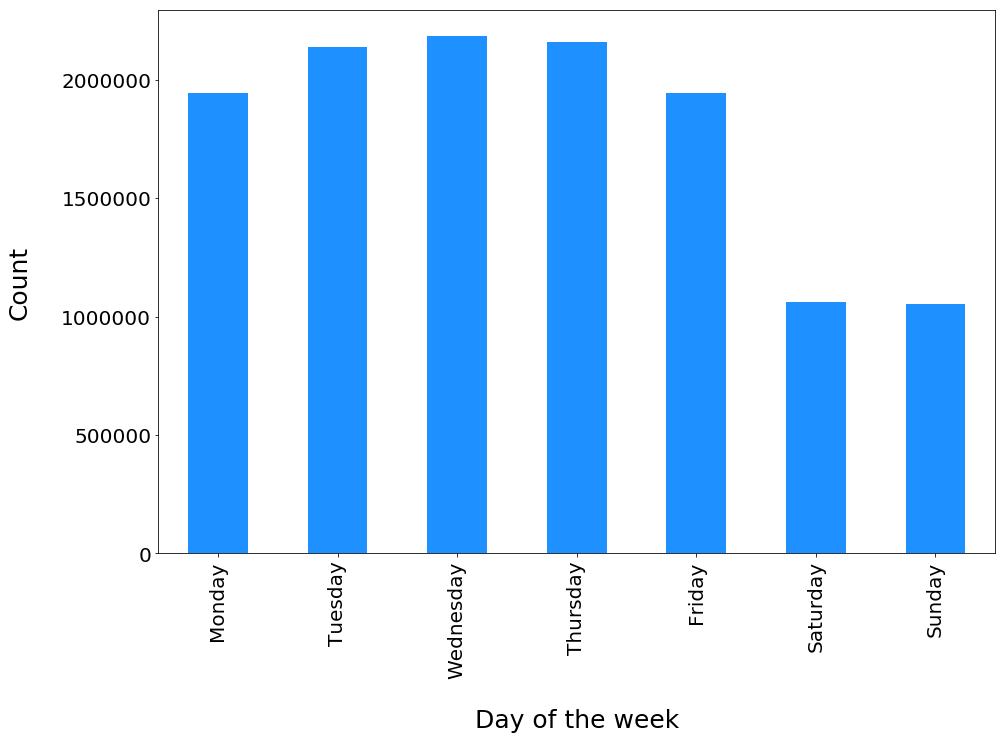

In [10]:
ax = df.plot(x = 'day', y = 'count', kind = 'bar', figsize = (15, 10), fontsize = 20, color = 'dodgerblue')
ax.set_xlabel("Day of the week",fontsize = 25, labelpad = 30)
ax.set_ylabel("Count",fontsize = 25, labelpad = 30)
ax.legend_.remove()
plt.show()

**WordCloud: Question Title**

In [11]:
question_title_query = """
SELECT title
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE CAST(creation_date AS DATE) = DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)
        """

In [12]:
bq_assistant.estimate_query_size(question_title_query)

0.9524144940078259

In [13]:
question_title = stackOverflow.query_to_pandas_safe(question_title_query).iloc[:,0]

In [14]:
question_title_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(question_title))

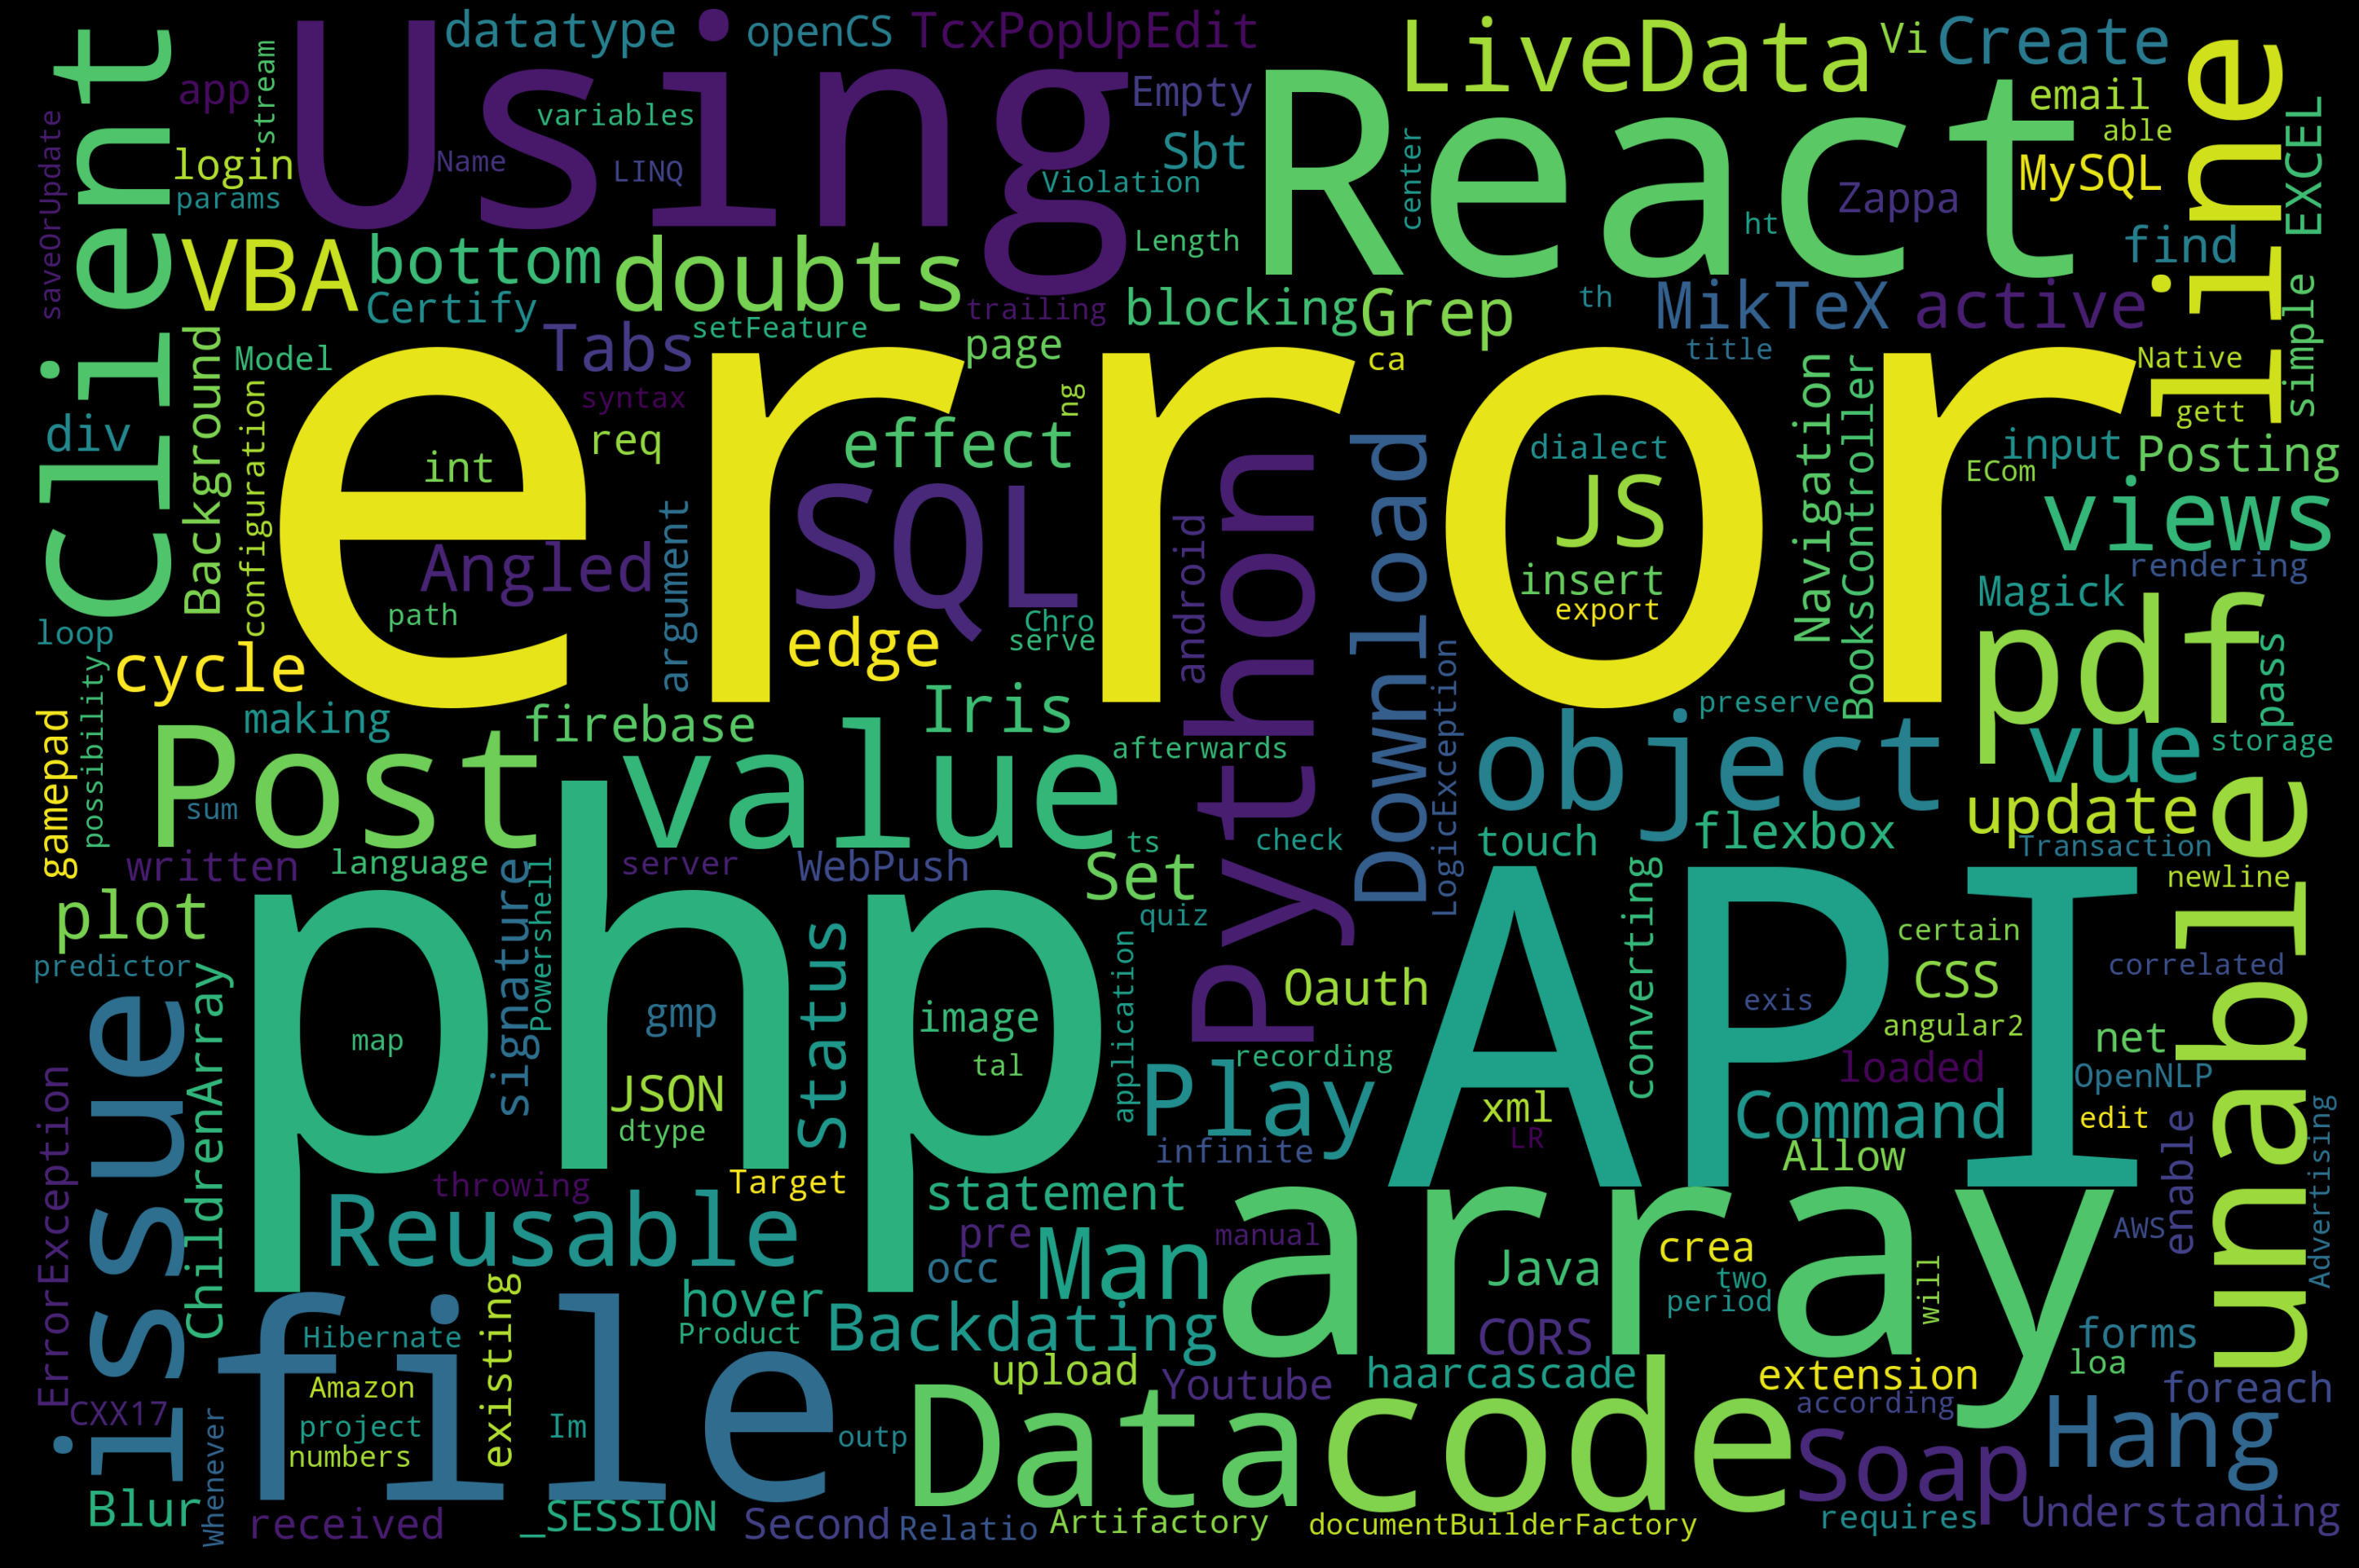

In [15]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(question_title_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**WordCloud: Question Tags**

In [16]:
question_tags_query = """
SELECT tags
FROM `bigquery-public-data.stackoverflow.posts_questions`
WHERE CAST(creation_date AS DATE) = DATE_SUB(CURRENT_DATE(), INTERVAL 1 YEAR)
        """

In [17]:
bq_assistant.estimate_query_size(question_tags_query)

0.5346579430624843

In [ ]:
question_tags = stackOverflow.query_to_pandas_safe(question_tags_query).iloc[:,0]

In [ ]:
question_tags_wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(question_tags))

In [ ]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(question_tags_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()